In [1]:
#Important for getting the widget outputs to be interactive
# %matplotlib widget
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pymatgen.core as mg
from pymatgen.transformations.advanced_transformations import EnumerateStructureTransformation as EST
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from gemmi import cif
from SARA_cornell_funcs import TTtoQ, QtoTT, spectral_reconstruct, Gaussian
import copy as cp
import seaborn as sns


Start with the initial rutile and anatase structures reported on the ICSD and try to modify them.

In [2]:
rut = mg.Structure.from_file("/home/duncan/Documents/CIFs/MnTiO3-FeTiO3/Ti-O/TiO2_Rutile_CollCode159915.cif")
ana = mg.Structure.from_file("/home/duncan/Documents/CIFs/Ti-Sn-O/Ti-Sn-O/Ti3Sn-Ox_Anatase_CollCode72769.cif")

In [6]:
rut_mod = cp.deepcopy(rut)[:2]

In [9]:
ana_mod = cp.deepcopy(ana)
rut_mod = cp.deepcopy(rut)

for idx, site in enumerate(ana[:4]):
    ana_mod[idx] = {"Ti4+": 0.5, "Sn4+": 0.5}
    
# for idx, site in enumerate(rut[:2]):
#     rut_mod[idx] = {"Ti4+": 0.5, "Sn4+": 0.5}

# test = cp.deepcopy(ana_mod)
# test.lattice.c = test.lattice.a

fig,ax = plt.subplots(2,1,dpi=150)
Qs = []
DPs = []
Is = []
PPs = []
SIMS = []
qr = np.round(np.linspace(15,40,451,dtype='float'),1)
HKL = []

for xtal in [ana,ana_mod,rut,rut_mod]:
    xc = XRDCalculator(wavelength = 1.2782)
    dp = xc.get_pattern(xtal)
    # Q = TTtoQ(tt)
    Qp,I = np.round(TTtoQ(dp.x),1), dp.y
    Qp = Qp[(Qp>15)&(Qp<40)].astype('float')
    Qs.append(Qp)
    Is.append(I)
    DPs.append(dp)
    pp = []
    for i in Qp:
        pp.append(np.where(i==qr)[0][0])
    PPs.append(pp)
    SIMS.append(spectral_reconstruct(Q=qr,peakpos=pp,heights=I,widths=0.1*np.ones(len(qr))))
    HKL.append(dp.hkls)
ax[0].plot(qr,SIMS[0],c='r',label='ana 3-1')
ax[0].plot(qr,SIMS[1]+25,c='dodgerblue',label='ana 1-1')
ax[1].plot(qr,SIMS[2],c='goldenrod',label='rut 17-3')
ax[1].plot(qr,SIMS[3]+25,c='orchid',label='rut 1-1')
ax[0].legend()
ax[1].legend()


# TaOx pseudo cubic

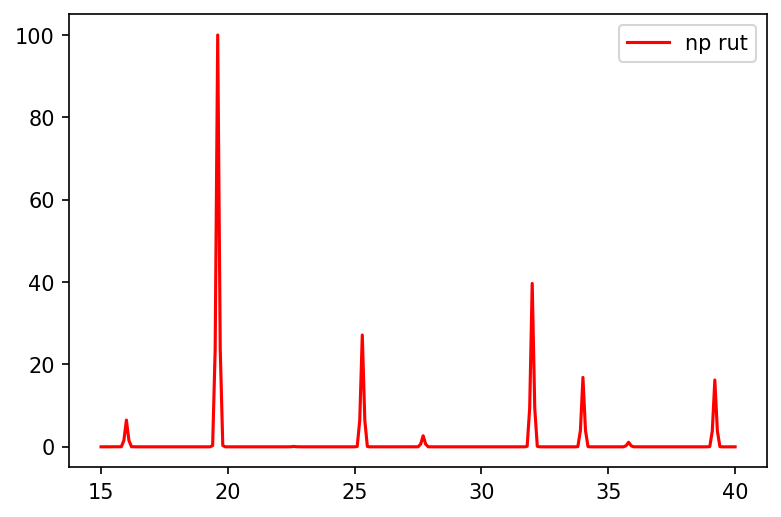

In [65]:
# lattice = mg.Lattice.tetragonal(a=4.4,c=3.14)
lattice = mg.Lattice.cubic(a=4.6)
np_rut = mg.Structure(lattice, ["Ti", "Fe", "O"], [[0, 0, 0], [0.5,0.5,0.5],[0.5, 0.5, 0]])
np_rut.get_space_group_info()


fig,ax = plt.subplots(1,1,dpi=150)
Qs = []
DPs = []
Is = []
PPs = []
SIMS = []
qr = np.round(np.linspace(15,40,451,dtype='float'),1)
HKL = []


xc = XRDCalculator(wavelength = 1.2782)
dp = xc.get_pattern(np_rut)
Qp,I = np.round(TTtoQ(dp.x),1), dp.y
Qp = Qp[(Qp>15)&(Qp<40)].astype('float')
Qs.append(Qp)
Is.append(I)
DPs.append(dp)
pp = []
for i in Qp:
    pp.append(np.where(i==qr)[0][0])
PPs.append(pp)
SIMS.append(spectral_reconstruct(Q=qr,peakpos=pp,heights=I,widths=0.1*np.ones(len(qr))))
HKL.append(dp.hkls)
ax.plot(qr,SIMS[0],c='r',label='np rut')
ax.legend()

In [60]:
theta1 = np.arctan(3.14/4.44)
theta1*180/np.pi
theta1*4.44/np.sqrt(2)

1.9325420333680516

In [61]:
2*np.pi/.193

32.55536428590459